# Analysis of Range of Models Experiment-1: Top End Models

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from game_analysis.data_processing import combine_game_results, load_game_state_from_folder, load_player_data_from_folder, \
        process_json_files_in_folder, calculate_troop_strength_over_time, \
            calculate_territory_control_over_time, \
                calculate_territory_ownership, binomial_test_p_value, \
                territory_troop_control_over_time
from game_analysis.visualizations import plot_wins_by_victory_condition, \
    plot_many_stacked_area_charts, plot_many_line_plots, \
    plot_average_troop_strength, plot_average_territory_control, \
    plot_average_troop_strength, plot_errors_over_time, \
    plot_accumulated_turn_time, creat_full_heatmap_plot

from constants import continent_mapping, TERRITORIES_ORDERED_BY_CONTINENTS



os.getcwd()   

'/app/game_analysis'

In [2]:
data_folder = "../game_results/experiment1_top_end_models"

In [3]:
# Define the player-to-color mapping
player_colors = {
    "gpt-4o": "#0072B2",  # Blue
    "Claude_Sonnet_3_5": "#E69F00",             # Orange
    "llama3.1_70": "#009E73"         # Green
}
# # Define the player-to-color mapping
# player_colors = {
#     "Strong(gpt-4o)": "#0072B2",  # Blue
#     "Medium(gpt-4o-mini)": "#E69F00",             # Orange
#     "Weak(gpt-3.5-turbo)": "#009E73"         # Green
# }  			



#### Load the data

In [4]:
# this shows the player data, like all the errors and time spent on their games
experiment1_player_data_df = combine_game_results(load_player_data_from_folder, data_folder)
experiment1_game_data_df = combine_game_results(load_game_state_from_folder, data_folder)
experiment_1_results_df =   combine_game_results(process_json_files_in_folder, data_folder)


#### Transform to create data for visualizations

In [5]:
troops_and_territory_over_time_df = territory_troop_control_over_time(experiment1_game_data_df)

In [ ]:
from scipy.stats import chisquare

# Observed wins for the three models
observed = [5, 3, 2]

# Expected wins under the null hypothesis (equal probability)
expected = [10 / 3] * 3

# Perform the chi-square goodness-of-fit test
chi2_statistic, p_value = chisquare(f_obs=observed, f_exp=expected)

chi2_statistic, p_value

(1.4, 0.4965853037914095)

In [6]:
experiment1_game_data_df

,Territory,gpt-4o,llama3.1_70,Claude_Sonnet_3_5,Turn_Number,Game_Round,Game_Number
0,Alaska,0,0,1,39,13,1
1,Northwest Territory,0,0,1,39,13,1
2,Greenland,0,0,1,39,13,1
3,Alberta,0,0,1,39,13,1
4,Ontario,0,0,1,39,13,1
...,...,...,...,...,...,...,...
14527,Indonesia,0,1,0,0,0,10
14528,New Guinea,0,0,1,0,0,10
14529,Western Australia,0,0,22,0,0,10
14530,Eastern Australia,0,0,1,0,0,10


In [7]:
from scipy.stats import chisquare

# Observed wins for the three models
observed = [5, 3, 2]

# Expected wins under the null hypothesis (equal probability)
expected = [10 / 3] * 3

# Perform the chi-square goodness-of-fit test
chi2_statistic, p_value = chisquare(f_obs=observed, f_exp=expected)

chi2_statistic, p_value

(np.float64(1.4), np.float64(0.4965853037914095))


#### Visualizations

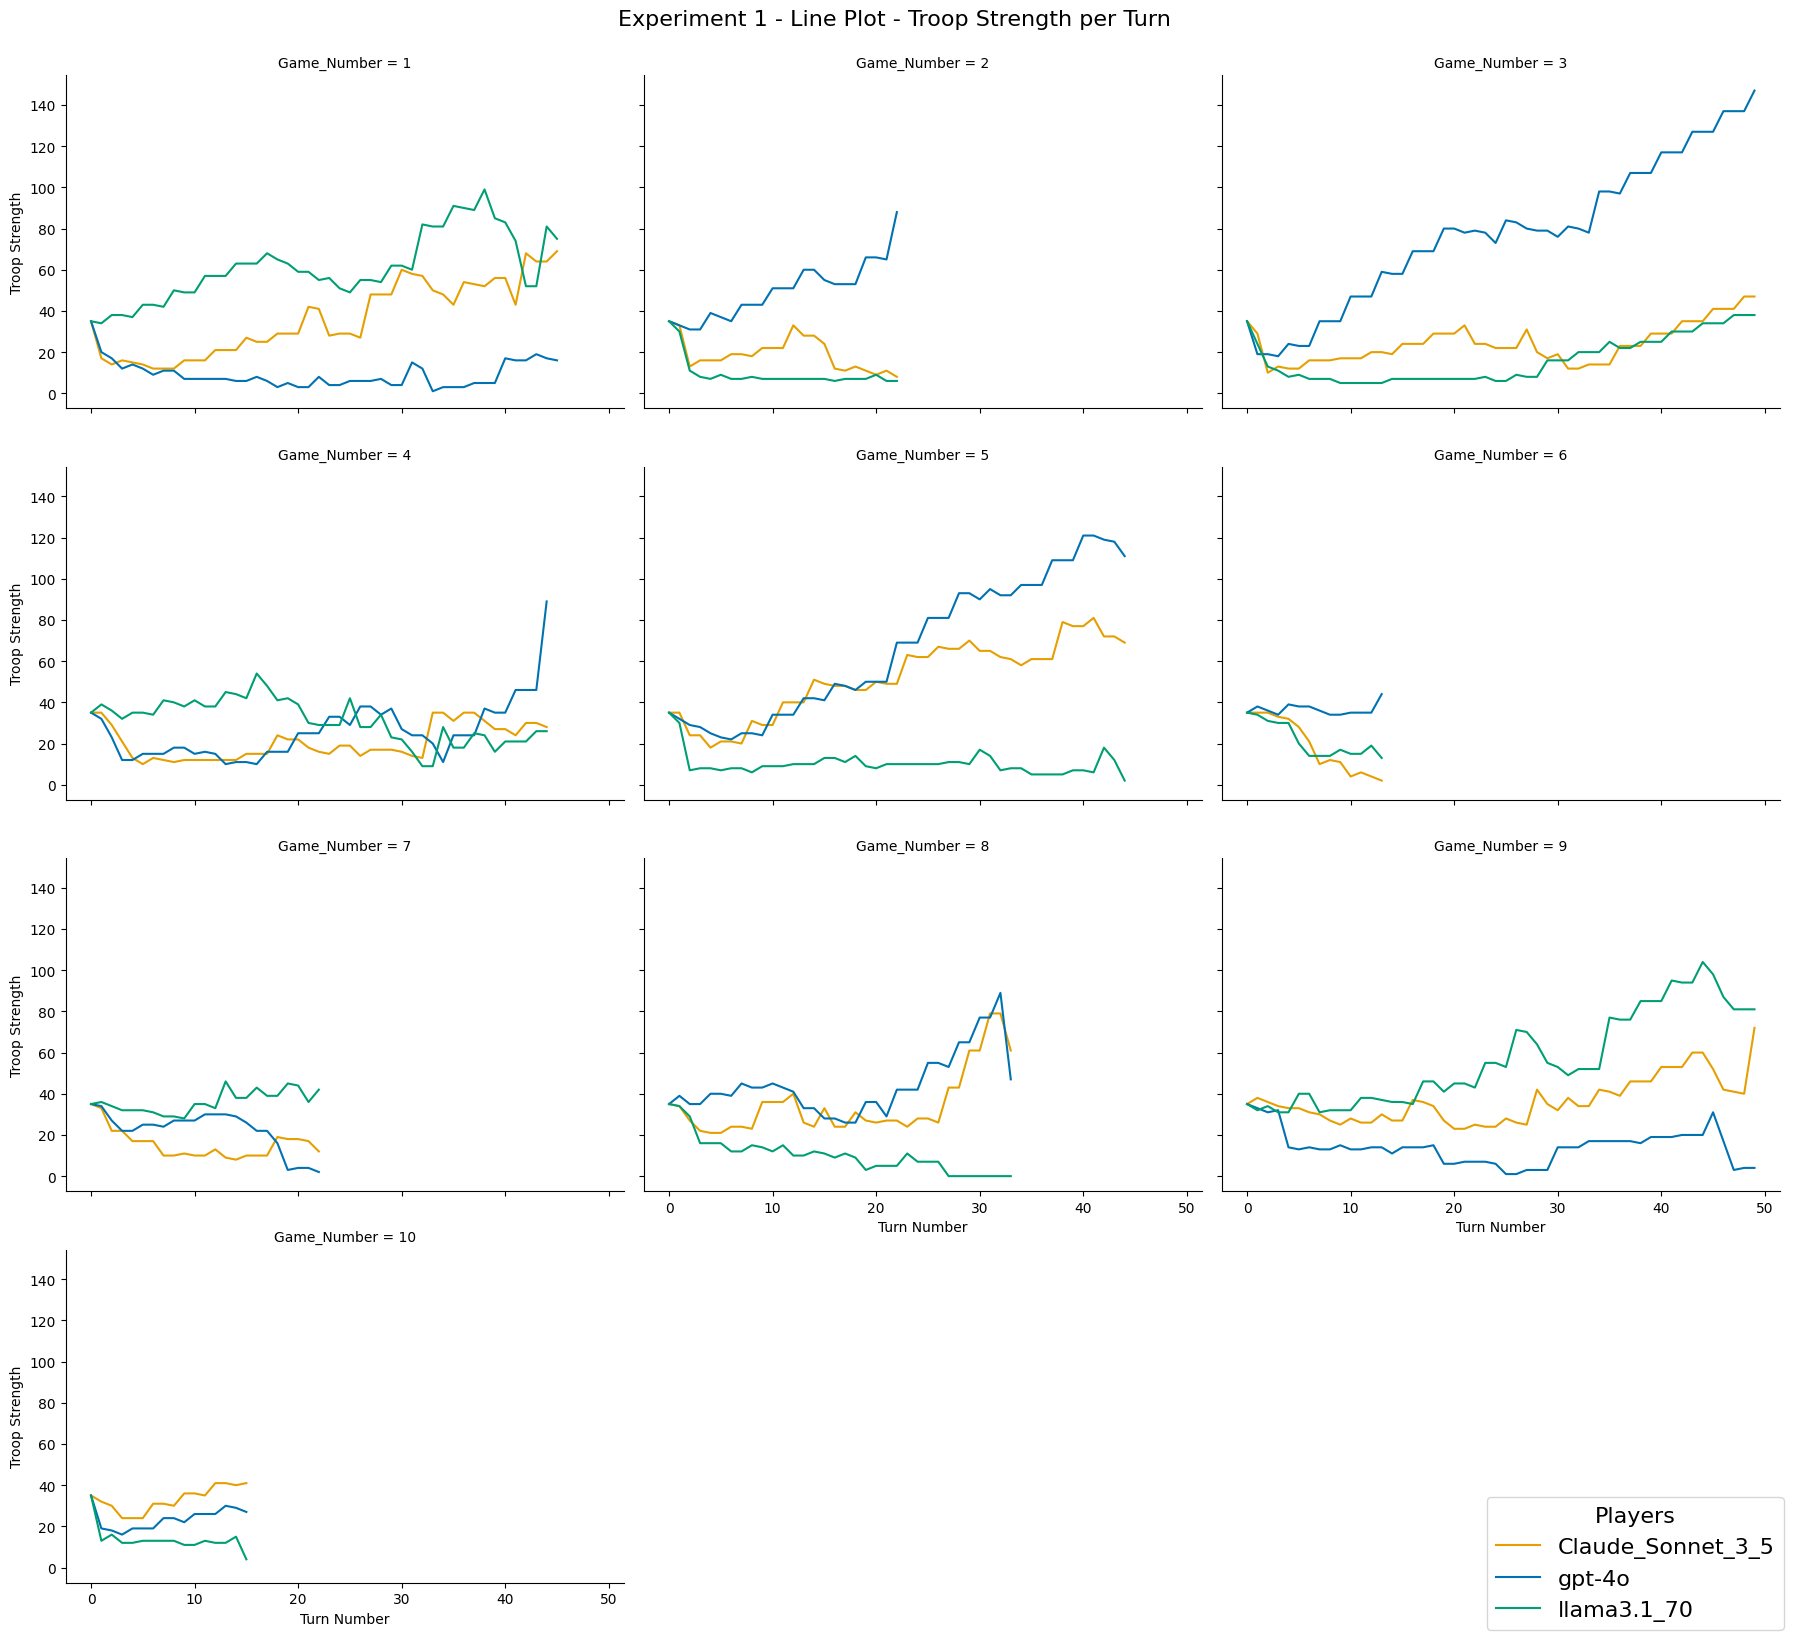

In [8]:
plot_many_line_plots(troops_and_territory_over_time_df,
        player_colors, "Experiment 1")

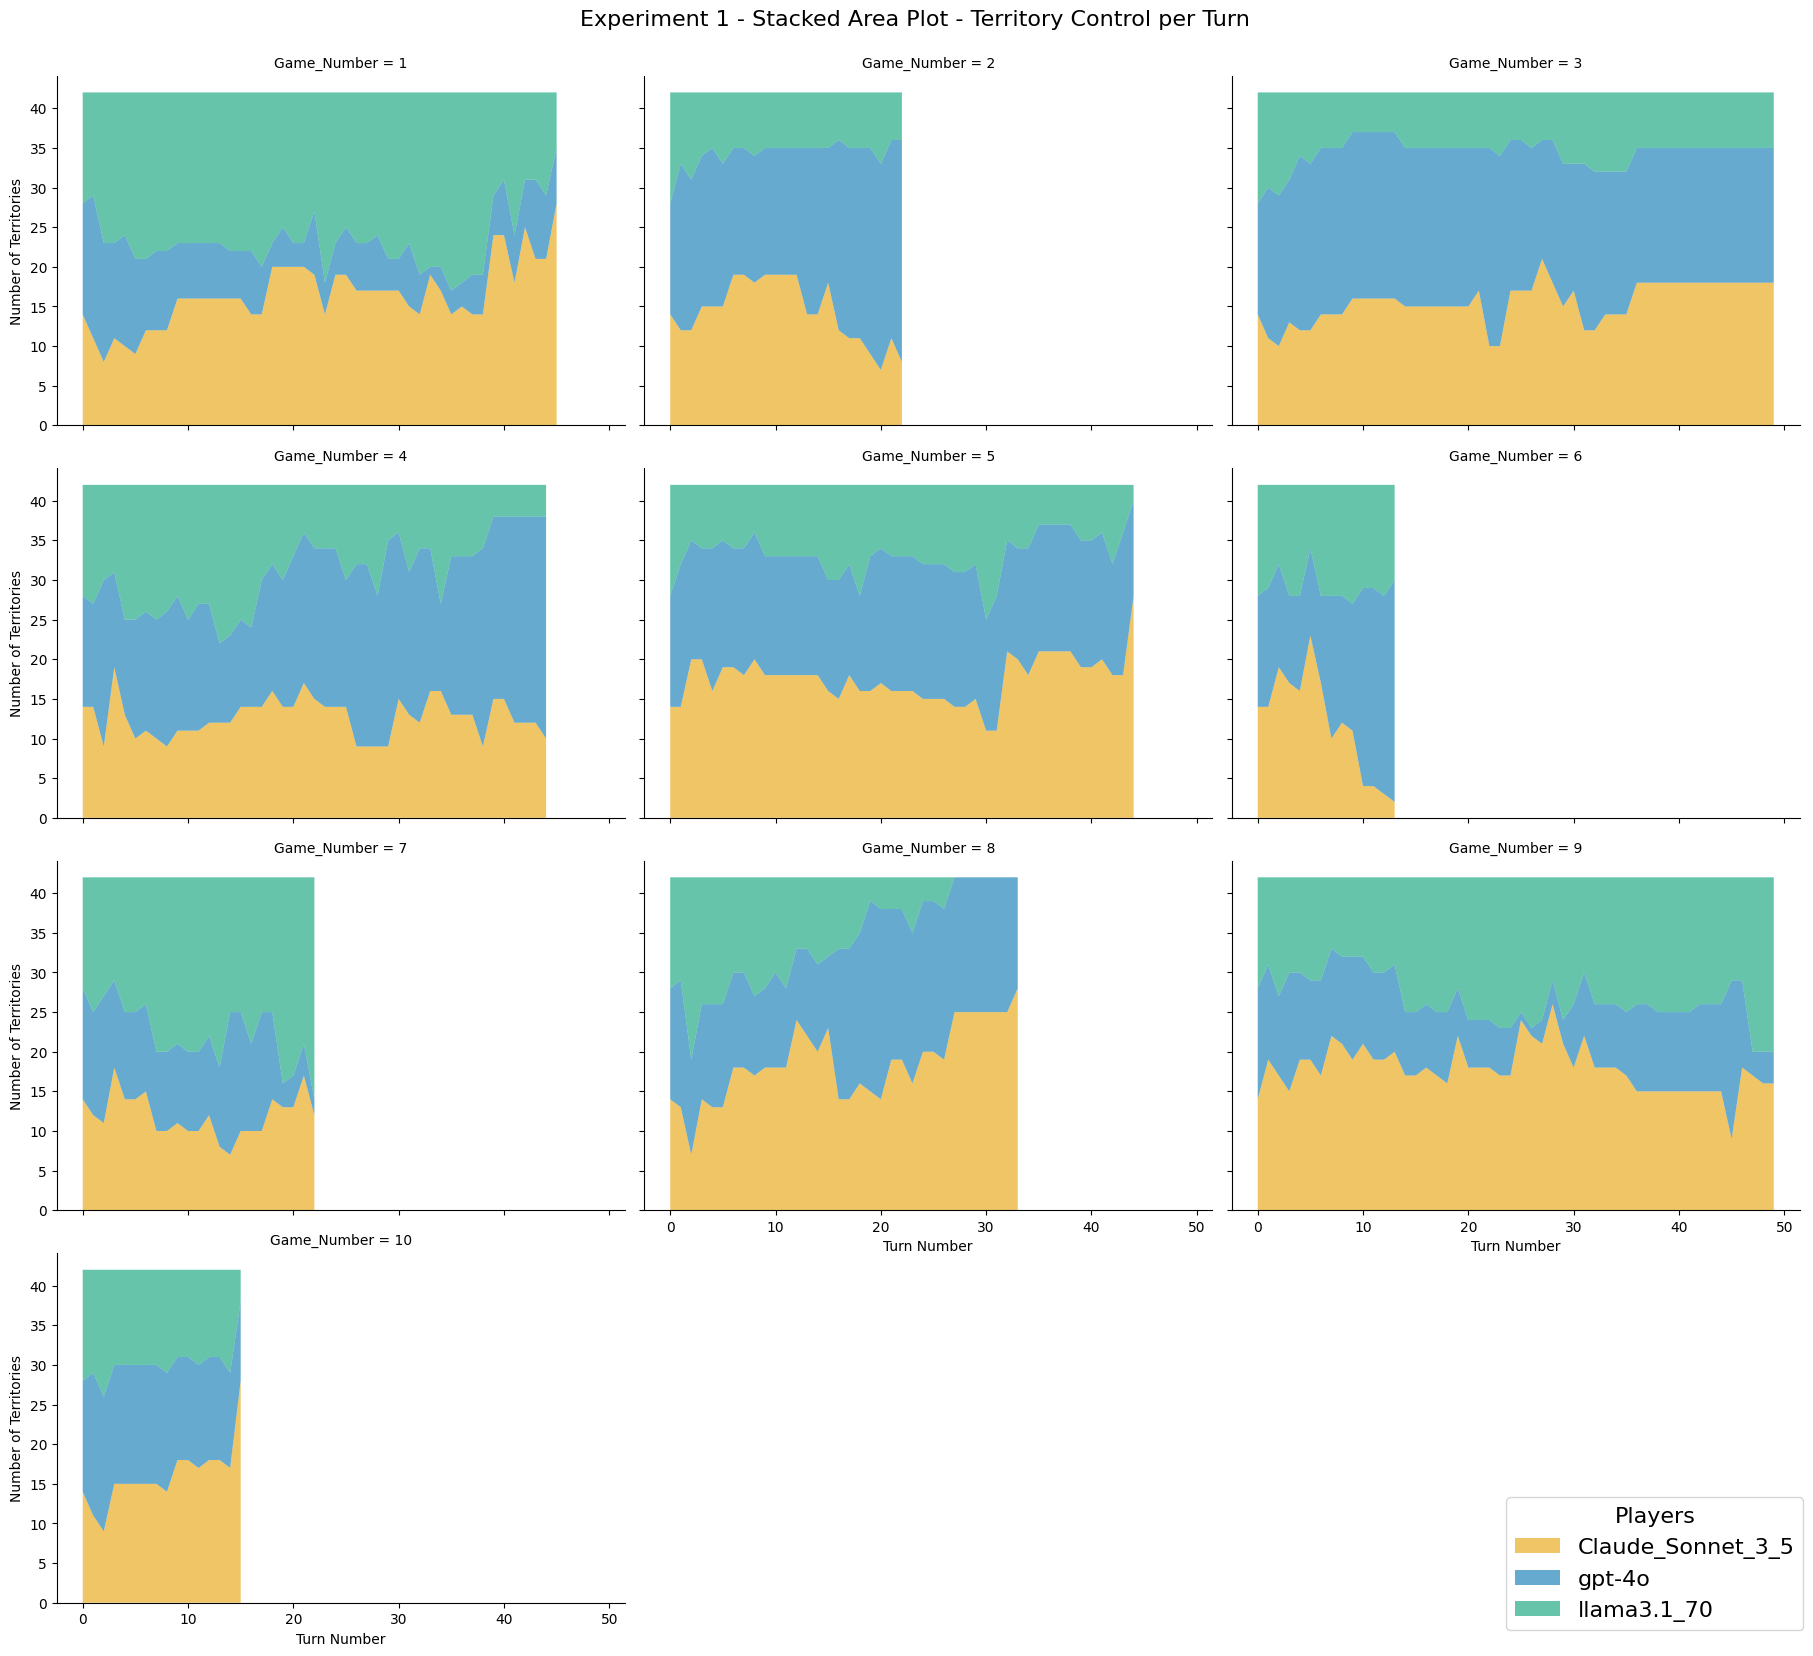

In [9]:
plot_many_stacked_area_charts(troops_and_territory_over_time_df,player_colors,"Experiment 1")

In [10]:
binomial_test_p_value(10, 1/3, 6)

0.07656353198191335

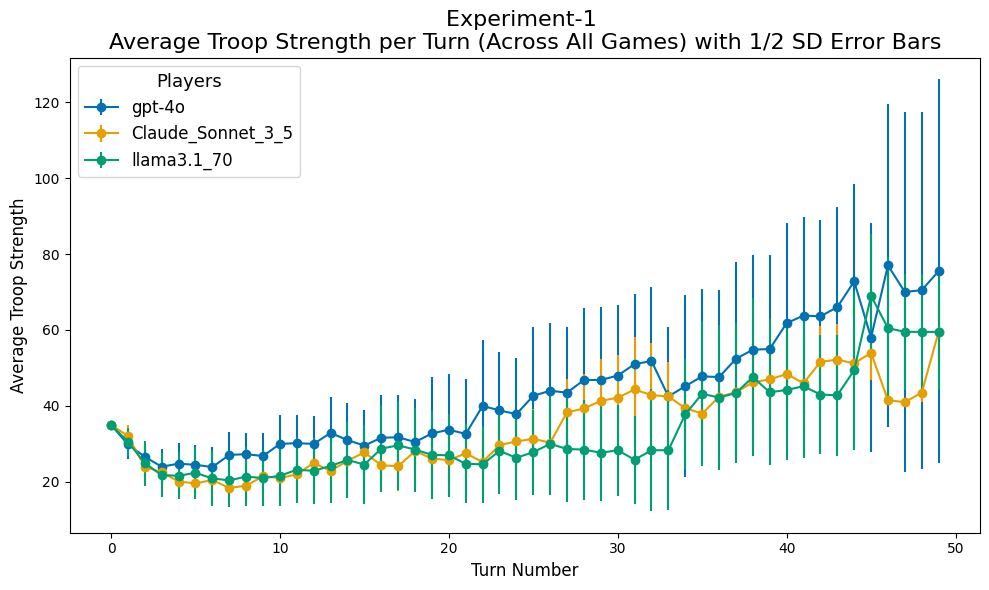

In [11]:
plot_average_troop_strength(troops_and_territory_over_time_df,player_colors, "Experiment-1")

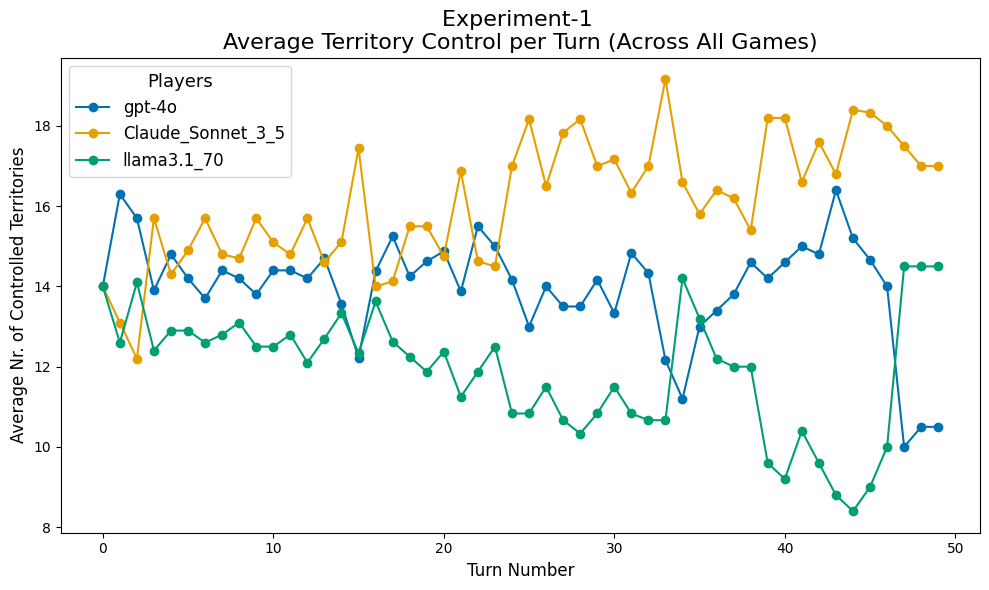

In [12]:
plot_average_territory_control(troops_and_territory_over_time_df, player_colors,"Experiment-1")

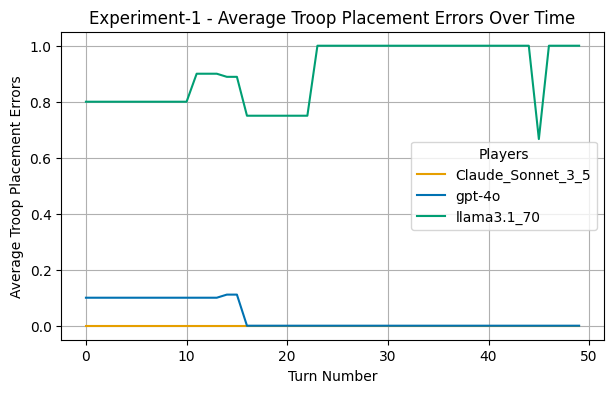

In [13]:
# Example usage:
plot_errors_over_time(experiment1_player_data_df, player_colors, 'Troop Placement Errors', "Experiment-1")

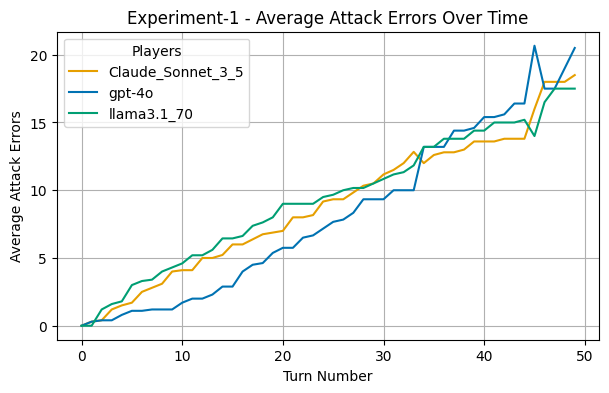

In [14]:
plot_errors_over_time(experiment1_player_data_df,player_colors, 'Attack Errors', "Experiment-1")


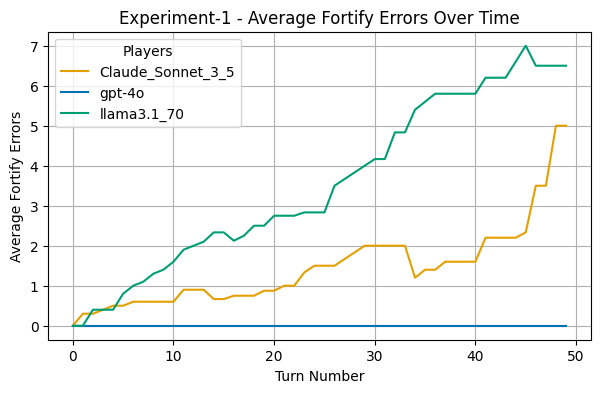

In [15]:
plot_errors_over_time(experiment1_player_data_df,player_colors, 'Fortify Errors', "Experiment-1")


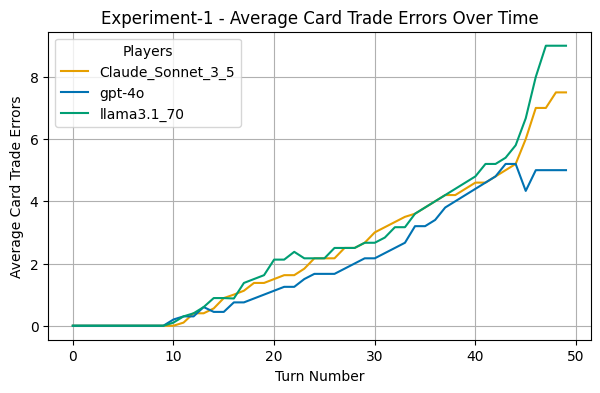

In [16]:
plot_errors_over_time(experiment1_player_data_df,player_colors, 'Card Trade Errors', "Experiment-1")

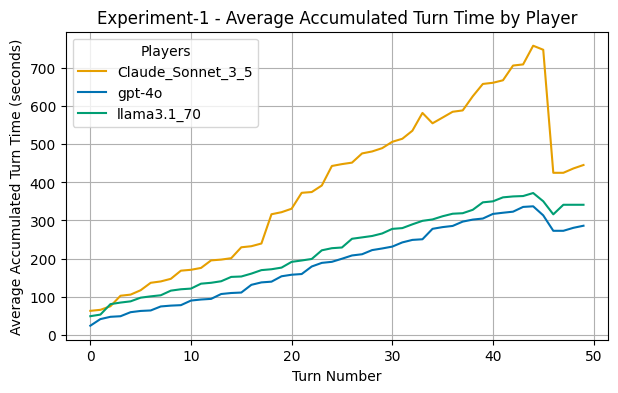

In [17]:

plot_accumulated_turn_time(experiment1_player_data_df,player_colors, "Experiment-1")


In [18]:
experiment1_player_data_df

,Name,Troop Placement Errors,Return Formatting Errors,Attack Errors,Fortify Errors,Card Trade Errors,Accumulated Turn Time,Turn_Number,Game_Round,Game_Number
0,gpt-4o,0,0,16,0,0,251.003448,23,8,1
1,llama3.1_70,0,0,7,1,2,293.853112,23,8,1
2,Claude_Sonnet_3_5,0,0,6,0,3,725.786692,23,8,1
3,gpt-4o,0,0,13,0,0,218.333958,20,7,1
4,llama3.1_70,0,0,4,1,2,270.299062,20,7,1
...,...,...,...,...,...,...,...,...,...,...
1033,llama3.1_70,2,2,4,3,0,90.032959,5,2,10
1034,Claude_Sonnet_3_5,0,0,1,0,0,109.899783,5,2,10
1035,gpt-4o,1,0,0,0,0,76.590544,11,4,10
1036,llama3.1_70,2,2,8,6,0,114.700391,11,4,10


/app/game_analysis/visualizations.py:487: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_heatmap_data = heatmap_data.replace(player_to_numeric)
/app/game_analysis/visualizations.py:522: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_heatmap_data = heatmap_data.replace(player_to_numeric)
/app/game_analysis/visualizations.py:522: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

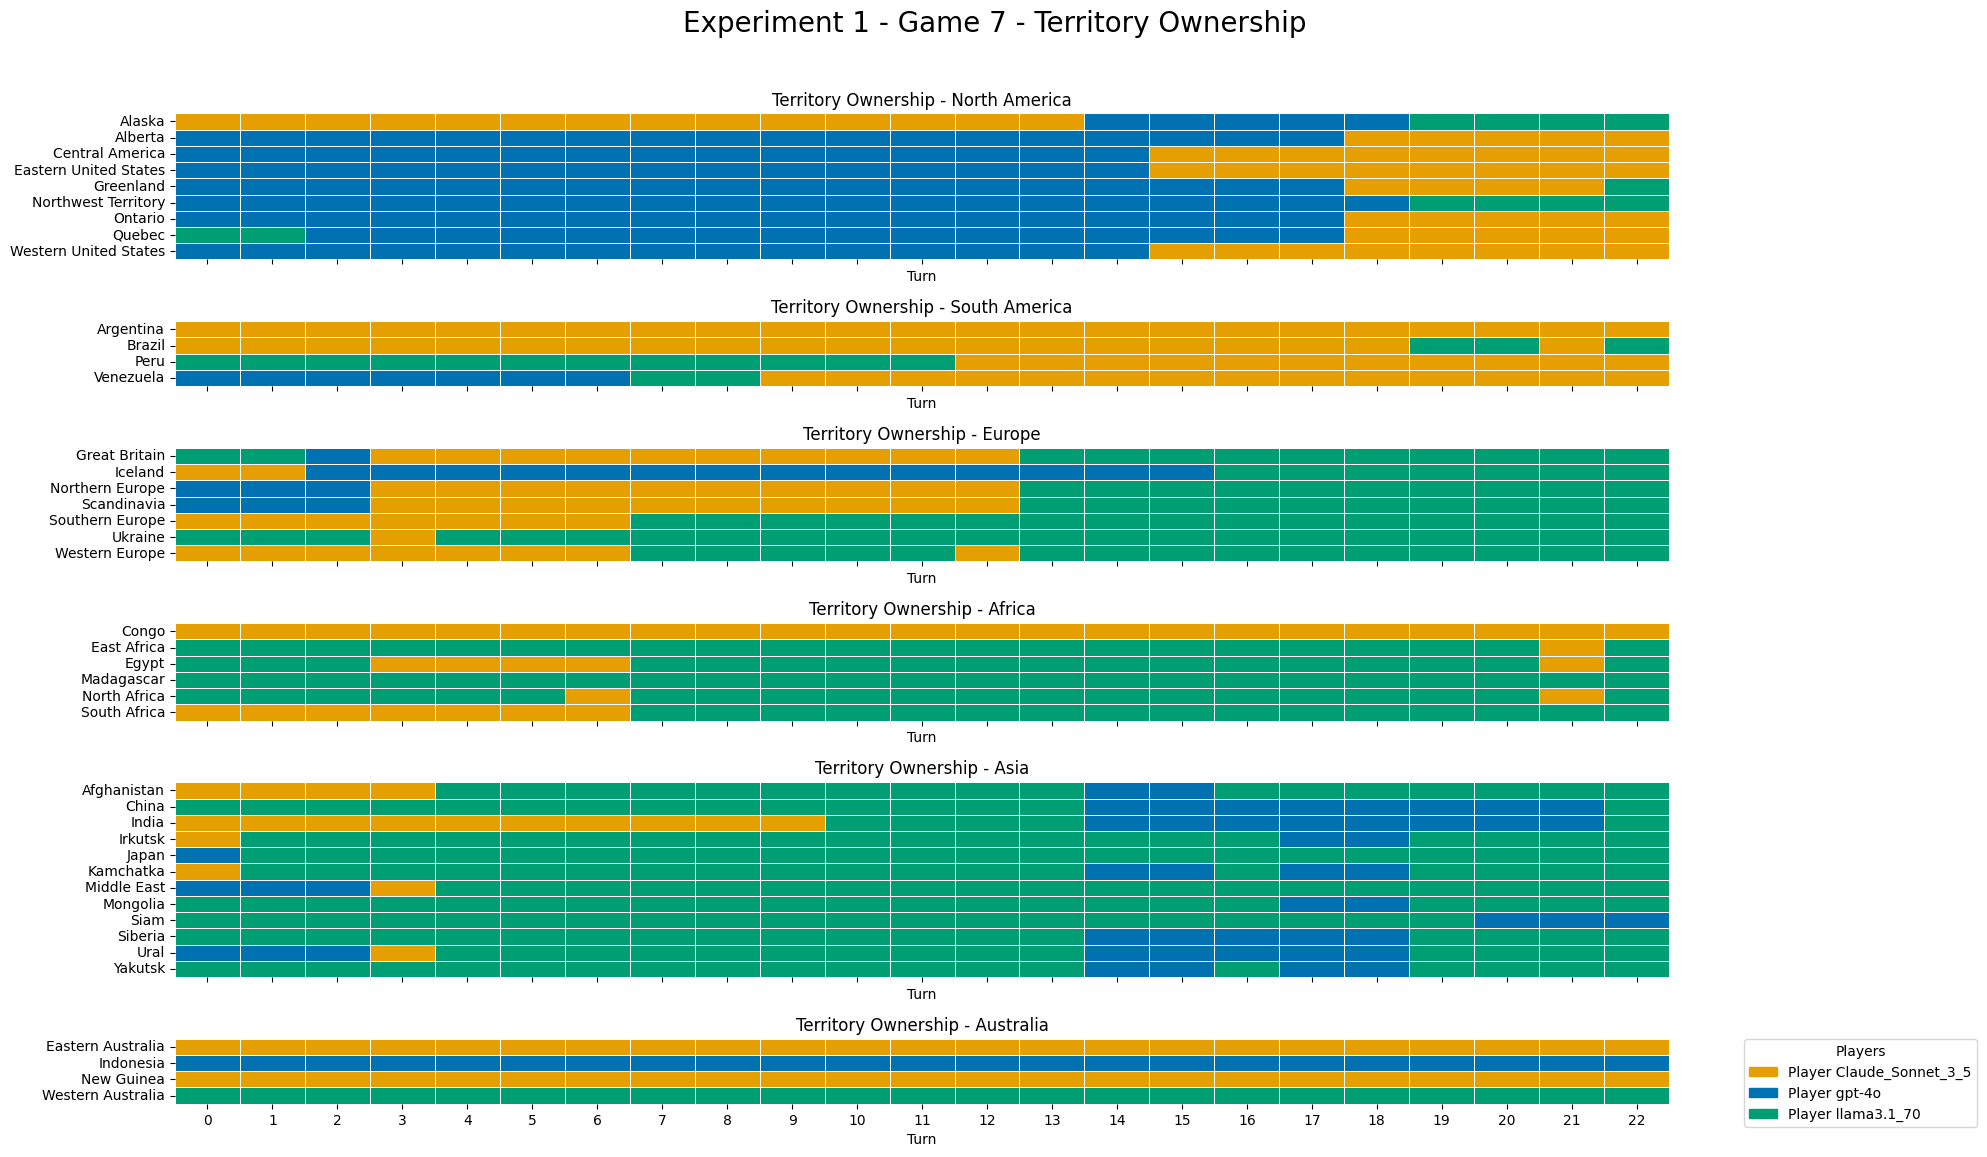

In [19]:
creat_full_heatmap_plot(experiment1_game_data_df, continent_mapping, player_colors, 7, "Experiment 1")

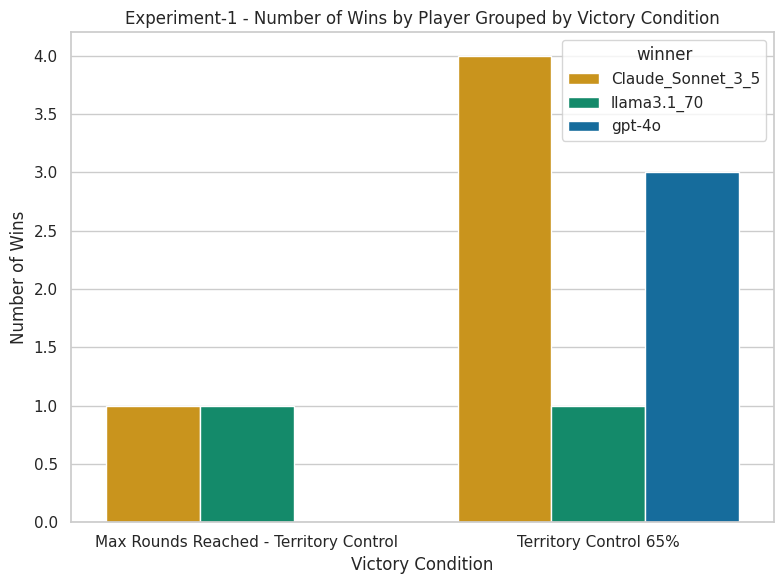

In [20]:
plot_wins_by_victory_condition(experiment_1_results_df,player_colors ,"Experiment-1")
   
